전이 학습 : transfer learning

데이터가 충분하지 않은 상황에서, 이미 학습한 가중치 값을 가져와 사용하는 방법

In [ ]:
# 데이터 준비
from google.colab import files
uploaded = files.upload()

# colab > run_project 폴더에 있는 colab_train_test.zip 파일을 선택합니다.
my_data = 'colab_train_test.zip'
!unzip colab_train_test.zip

Saving colab_train_test.zip to colab_train_test.zip
Archive:  colab_train_test.zip
   creating: test/ad/
  inflating: test/ad/ad_test_1.jpg   
  inflating: test/ad/ad_test_10.jpg  
  inflating: test/ad/ad_test_11.jpg  
  inflating: test/ad/ad_test_12.jpg  
  inflating: test/ad/ad_test_13.jpg  
  inflating: test/ad/ad_test_14.jpg  
  inflating: test/ad/ad_test_15.jpg  
  inflating: test/ad/ad_test_16.jpg  
  inflating: test/ad/ad_test_17.jpg  
  inflating: test/ad/ad_test_18.jpg  
  inflating: test/ad/ad_test_19.jpg  
  inflating: test/ad/ad_test_2.jpg   
  inflating: test/ad/ad_test_20.jpg  
  inflating: test/ad/ad_test_21.jpg  
  inflating: test/ad/ad_test_22.jpg  
  inflating: test/ad/ad_test_23.jpg  
  inflating: test/ad/ad_test_24.jpg  
  inflating: test/ad/ad_test_25.jpg  
  inflating: test/ad/ad_test_26.jpg  
  inflating: test/ad/ad_test_27.jpg  
  inflating: test/ad/ad_test_28.jpg  
  inflating: test/ad/ad_test_29.jpg  
  inflating: test/ad/ad_test_3.jpg   
  inflating: test/ad/

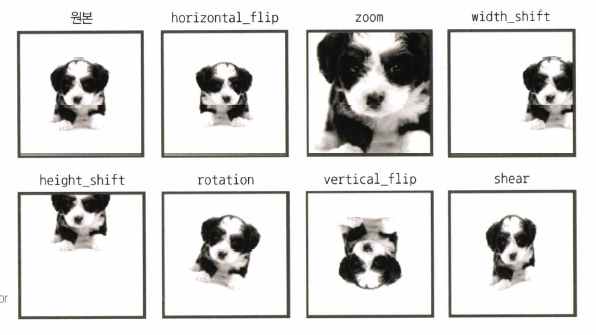

ImageDataGenerator의 각각의 인자들의 효과

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers, initializers, regularizers, metrics

np.random.seed(3)
tf.random.set_seed(3)

# 데이터의 수를 늘리는 데 효과적인 방법
train_datagen = ImageDataGenerator(rescale=1./255,    # RGB 값을 각각 255로 나누어서 0과 1 사이의 값으로 만듭니다.
                                  horizontal_flip=True,     #수평 대칭 이미지를 50% 확률로 만들어 추가합니다.
                                  width_shift_range=0.1,  #전체 크기의 10% 범위에서 좌우로 이동합니다.
                                  height_shift_range=0.1, #마찬가지로 위, 아래로 이동합니다.
                                  #rotation_range=5,    # 회전
                                  #shear_range=0.7,    # 하나의 좌표 고정 + 다른 좌표 이동
                                  #zoom_range=[0.9, 2.2],    # 수평, 수직 각각의 확대 비
                                  #vertical_flip=True,
                                  fill_mode='nearest') # 이미지 축소/회전/이동 시 생긴 비공간을 어떻게 할 것인가.
                                  # nearest는 가까운 색으로 채우는 것

# 그냥 데이터 불러오는 함수
train_generator = train_datagen.flow_from_directory(
       'train',   #학습셋이 있는 폴더의 위치입니다.
       target_size=(150, 150), # 이미지 사이즈
       batch_size=5,
       class_mode='binary')  # 치매/정상 2진 분류

#테스트 셋은 이미지 부풀리기 과정을 진행하지 않습니다.
test_datagen = ImageDataGenerator(rescale=1./255)  

test_generator = test_datagen.flow_from_directory(
       'test',   #테스트셋이 있는 폴더의 위치입니다.
       target_size=(150, 150),
       batch_size=5,
       class_mode='binary')

Found 160 images belonging to 2 classes.
Found 120 images belonging to 2 classes.


In [ ]:
# 앞서 배운 CNN 모델을 만들어 적용해 보겠습니다.
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(150,150,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(2))
model.add(Activation('softmax'))

#모델을 컴파일 합니다. 
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizers.Adam(learning_rate=0.0002), metrics=['accuracy'])

# 모델을 실행합니다
# 이 함수에 대해선 https://www.geeksforgeeks.org/keras-fit-and-keras-fit_generator/
history = model.fit_generator(
       train_generator,   # train_generator를 학습 모델로 사용
       steps_per_epoch=30,  # 한 번의 학습에서 몇 개의 샘플을 generator에서 추출할 지
       epochs=50,  
       validation_data=test_generator,
       validation_steps=10)
      # 앞서 만든 test_generator는 테스트셋으로 사용한다.

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
30/30 [==============================] - 31s 45ms/step - loss: 0.7054 - accuracy: 0.4533 - val_loss: 0.6856 - val_accuracy: 0.5200
Epoch 2/50
30/30 [==============================] - 1s 41ms/step - loss: 0.6971 - accuracy: 0.4867 - val_loss: 0.6853 - val_accuracy: 0.6800
Epoch 3/50
30/30 [==============================] - 1s 43ms/step - loss: 0.6904 - accuracy: 0.5467 - val_loss: 0.6843 - val_accuracy: 0.8000
Epoch 4/50
30/30 [==============================] - 1s 40ms/step - loss: 0.6838 - accuracy: 0.5600 - val_loss: 0.6750 - val_accuracy: 0.7200
Epoch 5/50
30/30 [==============================] - 1s 40ms/step - loss: 0.6818 - accuracy: 0.6067 - val_loss: 0.6504 - val_accuracy: 0.6200
Epoch 6/50
30/30 [==============================] - 1s 40ms/step - loss: 0.6646 - accuracy: 0.6800 - val_loss: 0.6349 - val_accuracy: 0.5400
Epoch 7/50
30/30 [==============================] - 1s 41ms/step - loss: 0.6359 - accuracy: 0.6133 - val_loss: 0.6099 - val_accuracy: 0.6800
Epoch 8/50
3

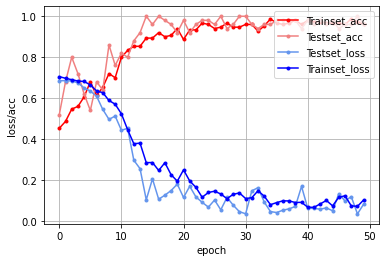

In [ ]:
#결과를 그래프로 표현하는 부분입니다.
acc= history.history['accuracy']
val_acc= history.history['val_accuracy']
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))  
plt.plot(x_len, acc, marker='.', c="red", label='Trainset_acc')
plt.plot(x_len, val_acc, marker='.', c="lightcoral", label='Testset_acc')
plt.plot(x_len, y_vloss, marker='.', c="cornflowerblue", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

plt.legend(loc='upper right') 
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss/acc')
plt.show()